In [23]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

from main import *

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exponential curve fitting

In [24]:
flood_analysis = FloodsAnalysis()
cost_points = flood_analysis.calculate_total_costs()[:-1]
probability_points = [0.1, 0.01, 0.001]

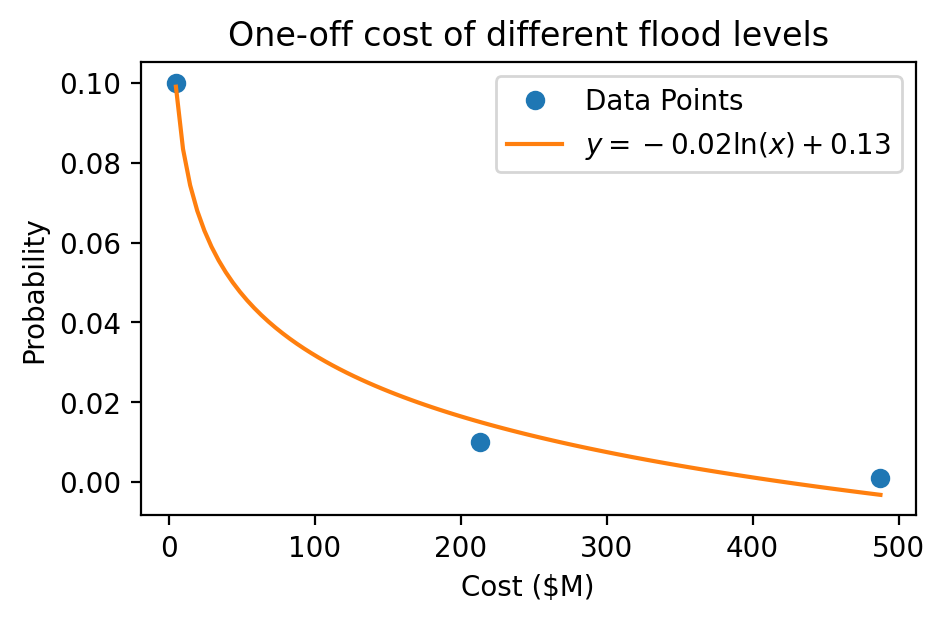

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def logarithmic_func(x, a, b):
    return a * np.log(x) + b

def fit_logarithmic_curve(cost_points, probability_points):
    popt, pcov = curve_fit(logarithmic_func, cost_points, probability_points)
    return popt

# Fit logarithmic curve to data
a, b = fit_logarithmic_curve(cost_points, probability_points)

# Create a range of cost values to generate the curve
x_vals = np.linspace(min(cost_points), max(cost_points), 100)

# Generate the logarithmic curve using the fitted parameters
y_vals = logarithmic_func(x_vals, a, b)

# Plot the data points and the logarithmic curve
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(cost_points, probability_points, 'o', label='Data Points')
ax.plot(x_vals, y_vals, label=r'Logarithmic Fit: $y = a\ln(x) + b$')

# Format the legend to include the equation for the logarithmic curve
eqn_str = fr'$y = {a:.2f}\ln(x) + {b:.2f}$'
ax.legend(labels=['Data Points', eqn_str])

# Set the axis labels and title
ax.set_xlabel('Cost ($M)')
ax.set_ylabel('Probability')
ax.set_title('One-off cost of different flood levels')

# Display the plot
plt.show()


In [92]:
flood_analysis = FloodsAnalysis()

matrix = np.vstack([flood_analysis.calculate_repair_costs(), 
           flood_analysis.calculate_rebuild_costs(), 
           flood_analysis.calculate_income_costs(),
           flood_analysis.calculate_rental_costs(),
           flood_analysis.calculate_total_costs()]).astype(int)

# define row and column labels
rows = ['Repair', 'Rebuild', 'Income', 'Rental', 'Total']
cols = ['1-in-10', '1-in-100', '1-in-1000', 'Annual exp. cost (all floods)']

# create pandas data frame
df = pd.DataFrame(data=matrix, index=rows, columns=cols)

# show the data frame
print(df)

         1-in-10   1-in-100  1-in-1000  Annual exp. cost (all floods)
Repair    161500    7267500   16651500                         458592
Rebuild  4493500  202207500  463303500                       12759648
Income     15559     700159    1604225                          44181
Rental     58662    2639812    6048412                         166576
Total    4729221  212814972  487607637                       13428998


In [86]:
161500+7267500+16651500

24080500

In [79]:
# Expected annual costs of varying flood levels
repair = np.array(flood_analysis.calculate_repair_costs())
rebuild = np.array(flood_analysis.calculate_rebuild_costs())
income = np.array(flood_analysis.calculate_income_costs())
rental = np.array(flood_analysis.calculate_rental_costs())

# Define a cost matrix with numpy
cost_matrix = np.vstack([repair, rebuild, income, rental])
cost_matrix.astype(int)

array([[    161500,    8500000,  127500000,    1129267],
       [   4493500,  236500000, 3547500000,   31420207],
       [     15559,     818900,   12283500,     108794],
       [     58662,    3087500,   46312500,     410189]])

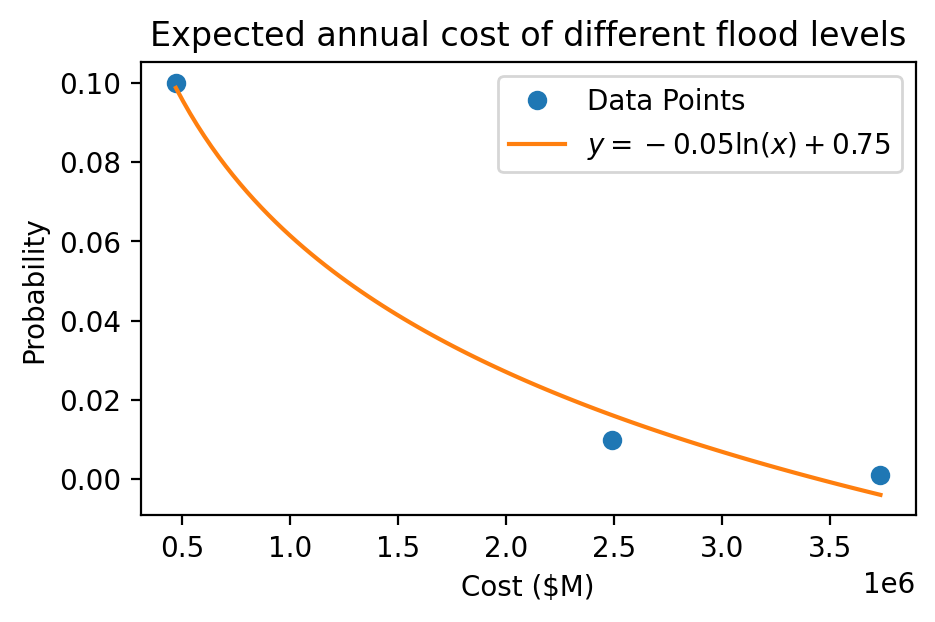

In [74]:
# Expected annual costs of varying flood levels
repair = np.array(flood_analysis.calculate_repair_costs())
rebuild = np.array(flood_analysis.calculate_rebuild_costs())
income = np.array(flood_analysis.calculate_income_costs())
rental = np.array(flood_analysis.calculate_rental_costs())

# Define a cost matrix with numpy
cost_matrix = np.vstack([repair, rebuild, income, rental])

# Calculate expected annual costs
expected_annual_costs = []
for i, y in enumerate([10, 100, 1000]):
    exp = (1/y)*cost_matrix[:, i].sum()
    expected_annual_costs.append(exp)

# Fit a logarithmic function as per above
cost_points = expected_annual_costs
probability_points = [0.1, 0.01, 0.001]

# Fit logarithmic curve to data
a, b = fit_logarithmic_curve(cost_points, probability_points)

# Create a range of cost values to generate the curve
x_vals = np.linspace(min(cost_points), max(cost_points), 100)

# Generate the logarithmic curve using the fitted parameters
y_vals = logarithmic_func(x_vals, a, b)

# Plot the data points and the logarithmic curve
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(cost_points, probability_points, 'o', label='Data Points')
ax.plot(x_vals, y_vals, label=r'Logarithmic Fit: $y = a\ln(x) + b$')

# Format the legend to include the equation for the logarithmic curve
eqn_str = fr'$y = {a:.2f}\ln(x) + {b:.2f}$'
ax.legend(labels=['Data Points', eqn_str])

# Set the axis labels and title
ax.set_xlabel('Cost ($M)')
ax.set_ylabel('Probability')
ax.set_title('Expected annual cost of different flood levels')

# Display the plot
plt.show()

# Heatmap sensitivity plots

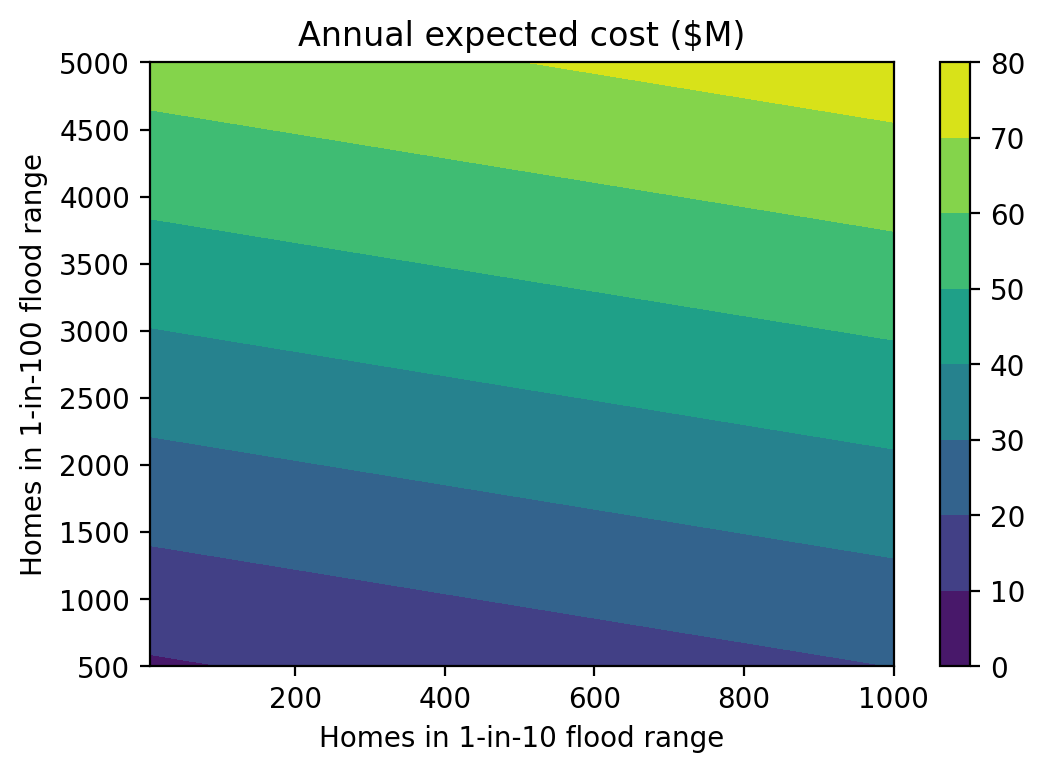

In [72]:
# Define the range and number of points for hh_in_1_to_10 and hh_in_1_to_100
hh_in_1_to_10_range = np.linspace(5, 1000, 100)
hh_in_1_to_100_range = np.linspace(500, 5000, 100)

# Create a 2D grid of points using numpy meshgrid function
hh_in_1_to_10_grid, hh_in_1_to_100_grid = np.meshgrid(hh_in_1_to_10_range, hh_in_1_to_100_range)

# Initialize an array to hold the expected cost values
expected_cost_grid = np.zeros_like(hh_in_1_to_10_grid)

# Loop over the points in the grid and calculate the expected cost at each point
for i in range(len(hh_in_1_to_10_range)):
    for j in range(len(hh_in_1_to_100_range)):
        flood_analysis = FloodsAnalysis(hh_in_1_to_10=hh_in_1_to_10_range[i], hh_in_1_to_100=hh_in_1_to_100_range[j])
        expected_cost = flood_analysis.calculate_total_costs()[-1]
        expected_cost_grid[j, i] = expected_cost

# Plot the contour map of the expected cost values
fig, ax = plt.subplots()
contour = ax.contourf(hh_in_1_to_10_grid, hh_in_1_to_100_grid, expected_cost_grid, cmap='viridis')
cbar = plt.colorbar(contour)

# Set the axis labels and title
ax.set_xlabel('Homes in 1-in-10 flood range')
ax.set_ylabel('Homes in 1-in-100 flood range')
ax.set_title('Annual expected cost ($M)')

# Display the plot
plt.show()

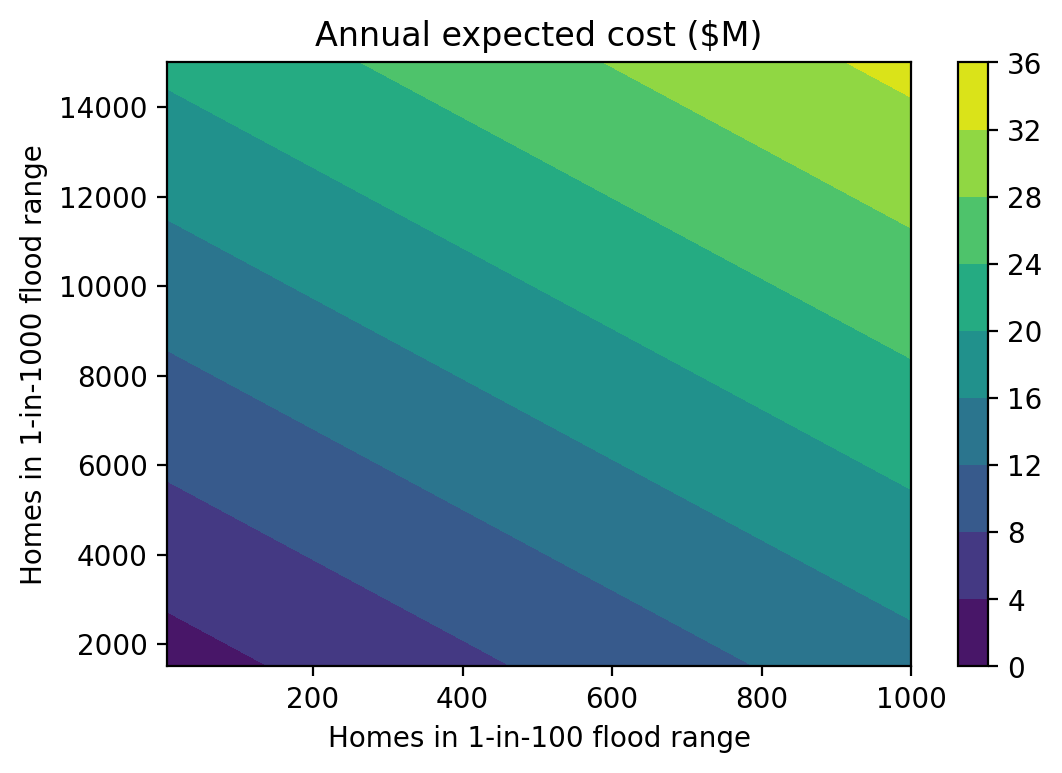

In [73]:
# Define the range and number of points for hh_in_1_to_10 and hh_in_1_to_100
hh_in_1_to_100_range = np.linspace(5, 1000, 100)
hh_in_1_to_1000_range = np.linspace(1500, 15000, 100)

# Create a 2D grid of points using numpy meshgrid function
hh_in_1_to_100_grid, hh_in_1_to_1000_grid = np.meshgrid(hh_in_1_to_100_range, hh_in_1_to_1000_range)

# Initialize an array to hold the expected cost values
expected_cost_grid = np.zeros_like(hh_in_1_to_100_grid)

# Loop over the points in the grid and calculate the expected cost at each point
for i in range(len(hh_in_1_to_100_range)):
    for j in range(len(hh_in_1_to_1000_range)):
        flood_analysis = FloodsAnalysis(hh_in_1_to_100=hh_in_1_to_100_range[i], hh_in_pmf=hh_in_1_to_1000_range[j])
        expected_cost = flood_analysis.calculate_total_costs()[-1]
        expected_cost_grid[j, i] = expected_cost

# Plot the contour map of the expected cost values
fig, ax = plt.subplots()
contour = ax.contourf(hh_in_1_to_100_grid, hh_in_1_to_1000_grid, expected_cost_grid, cmap='viridis')
cbar = plt.colorbar(contour)

# Set the axis labels and title
ax.set_xlabel('Homes in 1-in-100 flood range')
ax.set_ylabel('Homes in 1-in-1000 flood range')
ax.set_title('Annual expected cost ($M)')

# Display the plot
plt.show()